Import knihoven


In [18]:
from ultralytics import YOLO
import numpy as np
import cv2 
import cvzone
import time
import matplotlib.pyplot as plt
import math


Import souboru se jmeny 

In [19]:
#loads coco.names into list classNames 
classesfile='coco.names'
classNames=[]
with open(classesfile,'rt') as f:
    classNames=f.read().rstrip('\n').split('\n')

Model

In [20]:
model = YOLO('yolov8s.pt')#loads the model 

Pokud chci hledat urcity objekt zjisti jeho id

In [21]:
searched_object = 'teddy bear' #name of object I want to find
object_id = classNames.index(searched_object)# gets id of the object I want to find  
print(object_id)

77


nacte a zobrazy zvoleny obrazek

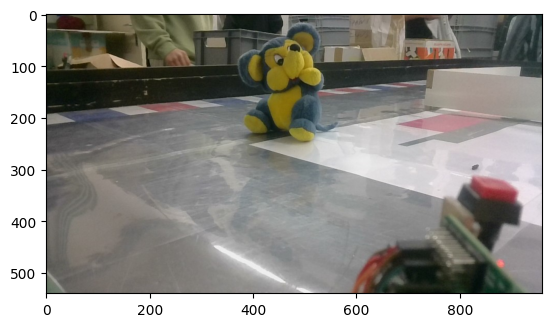

In [22]:
img = cv2.imread('test_modelu.jpg')#loads the picture into variable 
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))#show the picture in rgb because cv2 use BGR color model  

zjisti velikost obrazku 

In [23]:
img_height,img_width,img_channels = img.shape# gets some info 
print('width',img_width,'Px')#width
print('height',img_height,'Px')#height 
print('channels',img_channels)#colour channels 

width 960 Px
height 540 Px
channels 3


pouziti modelu na nalezeni objektu

In [24]:
results = model(img)#applies model on the image 



0: 384x640 4 persons, 1 truck, 1 teddy bear, 156.6ms
Speed: 2.0ms preprocess, 156.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


vykresleni jednotlivych objektu na obrazek

In [25]:
objects_ids = []#list for ids of found objects 
objects_centers = []#list for objects centers 
objects_heights = []# list for objects height, used for calculating distance of the objects
distances = [] 
for r in results:
        boxes = r.boxes
        for box in boxes:
            cls = int(box.cls[0])#gets the object id 
            print(classNames[cls])#prints the object class 
            print(cls) #prints the object id 
            #bounding boxes
            x1,y1,x2,y2 = box.xyxy [0] #x1 je pozice leveho horniho rohu objektu v ose x, x2 je velikost objektu v ose x v px 
            x1,y1,x2,y2 = int(x1),int(y1),int(x2),int(y2)#prevedeni hodnot na int pro lepsi praci s nima 
            print('X=',x1,'Y=',y1,'W=',x2,'H=',y2)#vypisuje velikost objektu a jeho polohu v px 
            if cls == 77:
                cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,255),3)#nakresli box okolo detekovane veci 
            #object center 
            center_x,center_y = x1+(x2/2),y1+(y2/2)#vypocet stredu objektu pro lepsi lokalizaci medveda 
            center_x,center_y = int(center_x-x1/2), int(center_y-y1/2)#prevede hodnoty na int aby se dali pouzit ve funkci ukazujici stred 
            center = center_x,center_y
            print('center:',center_x,center_y)#vypise udaje 
            if cls == 77:
                cv2.circle(img, (center_x,center_y),10, (255,0,255), thickness=-1)
            #model confidence
            conf = box.conf[0]#jistota modelu 
            conf = float(conf*100)
            rounded_conf = int(conf)#zaokrouhli jistotu modelu na dve desetina mista 
            print('confidence:',rounded_conf)
            #box on bounding box s nazvem claasy a confidence modelu
            if cls == 77:
                cvzone.putTextRect(img, f'{classNames[cls]}{rounded_conf}',(max(0,x1), max(35,y1)))#vykresli nazev classy objektu spolecne s confidence do videa 
            objects_ids.append(cls)#zapisovani hodnot do listu
            objects_centers.append(center)#zapisovani hodnot do listu
            objects_heights.append(y2)
            distance = img_height-y1-y2
            print(distance)
            distances.append(distance)
cv2.line(img,(int(img_width/2),0),(int(img_width/2),img_height),(255,0,0),thickness=2 )#vykresli na video primku stredem videa

teddy bear
77
X= 369 Y= 19 W= 565 H= 249
center: 467 134
confidence: 88
272
person
0
X= 159 Y= 1 W= 460 H= 104
center: 309 52
confidence: 86
435
truck
7
X= 592 Y= 309 W= 923 H= 536
center: 757 422
confidence: 48
-305
person
0
X= 690 Y= 1 W= 805 H= 88
center: 747 44
confidence: 48
451
person
0
X= 874 Y= 1 W= 959 H= 96
center: 916 48
confidence: 42
443
person
0
X= 336 Y= 1 W= 460 H= 41
center: 398 21
confidence: 34
498


array([[[ 88, 109, 107],
        [ 89, 110, 108],
        [ 92, 110, 109],
        ...,
        [ 59,  65,  42],
        [ 56,  62,  39],
        [ 55,  61,  38]],

       [[ 89, 110, 108],
        [ 89, 110, 108],
        [ 92, 110, 109],
        ...,
        [ 58,  64,  41],
        [ 55,  61,  38],
        [ 54,  60,  37]],

       [[ 92, 110, 109],
        [ 91, 109, 108],
        [ 91, 109, 108],
        ...,
        [ 56,  61,  40],
        [ 53,  59,  36],
        [ 52,  58,  35]],

       ...,

       [[ 95, 111,  94],
        [ 95, 111,  94],
        [ 95, 111,  94],
        ...,
        [142, 137, 138],
        [143, 138, 139],
        [143, 138, 139]],

       [[ 93, 109,  92],
        [ 94, 110,  93],
        [ 95, 111,  94],
        ...,
        [143, 138, 139],
        [143, 138, 139],
        [144, 139, 140]],

       [[ 92, 108,  91],
        [ 93, 109,  92],
        [ 94, 110,  93],
        ...,
        [143, 138, 139],
        [144, 139, 140],
        [145, 140, 141]]

vypise id nalezenych objektu 

In [26]:
print(objects_ids)
print(objects_centers)
print(objects_heights)

[77, 0, 7, 0, 0, 0]
[(467, 134), (309, 52), (757, 422), (747, 44), (916, 48), (398, 21)]
[249, 104, 536, 88, 96, 41]


hledani urciteho objektu

In [27]:
a = objects_ids.index(77)#in list object_ids search for specific number and returns index of the number
print(a)#prints the index 
x,y=objects_centers[a]#in list finds values for given index
print(x,y)#prints the values 
center_line = int(img_width/2)# x coordinates of image center
object_deviation = center_line-x # deviation of object from center of the screen 
print('deviation = ',object_deviation) 
h = objects_heights[a] # for given index finds object height 
print(h)
#measuring distances 
d=distances[a] # for given index finds distance of the object in px 
cv2.line(img,(0,(img_height-d)),(img_width,(img_height-d)),(0,255,0),thickness=2) #draws a line where is the object 
print(d) # prints object distance in px
#calculator from px to cm 
#if distance in px is larger than 240 px use this equation
if d>240:
    distance_cm = 0.001894930772332081 * (d- 62.49315340028377 )**2+ 41.845975945942605
#if distance in px is smaller than 240 px use this equation
if d<240:
    distance_cm = np.exp( 3.486047002894599 )*np.exp(0.0045*d)
print('distance:',distance_cm,'cm')# prints the value in cm
#angle calculating 
angle = math.atan(object_deviation/d)
print(np.rad2deg(angle),'°')
#way lenght 
w = distance_cm/(math.cos(abs(angle)))
print('distance to target:',w,'cm')





0
467 134
deviation =  13
249
272
distance: 125.02039740092988 cm
2.736318990225982 °
distance to target: 125.1631066023239 cm


ukaze obrazek

tensor([[3.6991e+02, 1.9199e+01, 5.6558e+02, 2.4937e+02, 8.8047e-01, 7.7000e+01],
        [1.5917e+02, 1.7007e+00, 4.6085e+02, 1.0452e+02, 8.6401e-01, 0.0000e+00],
        [5.9288e+02, 3.0979e+02, 9.2333e+02, 5.3657e+02, 4.8734e-01, 7.0000e+00],
        [6.9068e+02, 1.0080e+00, 8.0586e+02, 8.8785e+01, 4.8322e-01, 0.0000e+00],
        [8.7472e+02, 1.3240e+00, 9.5969e+02, 9.6592e+01, 4.2181e-01, 0.0000e+00],
        [3.3663e+02, 1.5862e+00, 4.6033e+02, 4.1709e+01, 3.4745e-01, 0.0000e+00]])


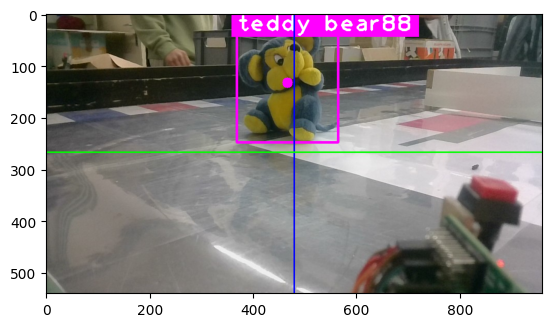

In [28]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))# konvertuje bgr to rgb
print(boxes.data)
